**Importing required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score , classification_report
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings("ignore")

**Exploratory Data Analysis**

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\student_data.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,fifth choice,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),first choice,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,fifth choice,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,second choice,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,first choice,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.shape

(4424, 37)

In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4423 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance	                     4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

**Missing Value**

In [6]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 1
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
df.dropna(axis=0 , inplace=True)

In [8]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

**Duplicate**

In [9]:
df.duplicated().sum()

0

**Data Type**

In [10]:
df.dtypes

Marital status                                     object
Application mode                                   object
Application order                                  object
Course                                             object
Daytime/evening attendance\t                       object
Previous qualification                             object
Previous qualification (grade)                    float64
Nacionality                                        object
Mother's qualification                             object
Father's qualification                             object
Mother's occupation                                object
Father's occupation                                object
Admission grade                                   float64
Displaced                                           int64
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender        

In [11]:
df.rename(columns= {'Daytime/evening attendance\t':'Attendance'} , inplace=True)

In [12]:
df.rename(columns = {'Nacionality' : 'Nationality'} , inplace=True)

**EDA--Univariate Analysis**

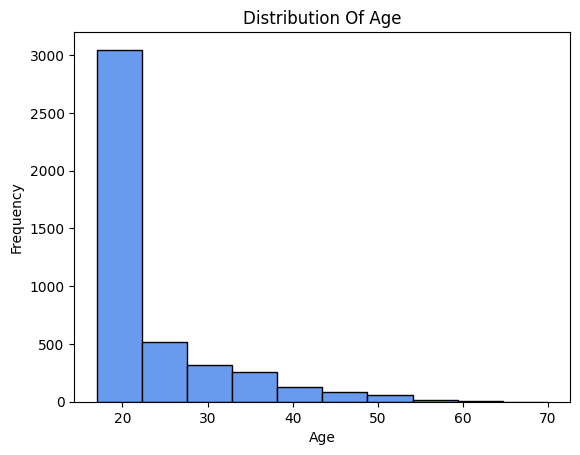

<Figure size 600x400 with 0 Axes>

In [13]:
plt.hist(df['Age at enrollment'], edgecolor='black' , color='#689bed')
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.figure(figsize=(6,4))
plt.show()

**Insights:- Majority of people's age are in between 18-23 and also there is age ranges 17 to 70 year old**

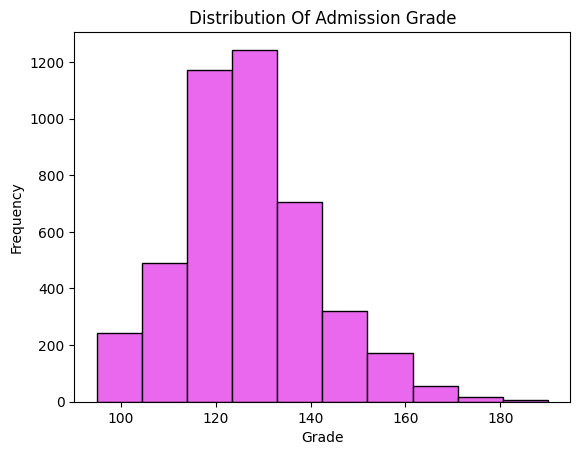

<Figure size 600x400 with 0 Axes>

In [14]:
plt.hist(df['Admission grade'], edgecolor='black' , color='#e968ed')
plt.title('Distribution Of Admission Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.figure(figsize=(6,4))
plt.show()

In [15]:
df['Admission grade'].min() , df['Admission grade'].max()

(95.0, 190.0)

**Insights:- Admission grade ranges from 95-190 , Mojority of people have Admission grade in between 110-130.**

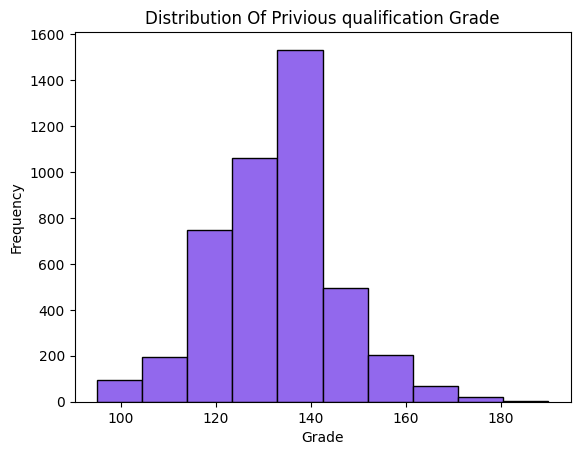

<Figure size 600x400 with 0 Axes>

In [16]:
plt.hist(df['Previous qualification (grade)'], edgecolor='black' , color='#9268ed')
plt.title('Distribution Of Privious qualification Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.figure(figsize=(6,4))
plt.show()

**Insights:- Privious Qualification grade ranges from 95-190 , Mojority of people have Admission grade is 140.**

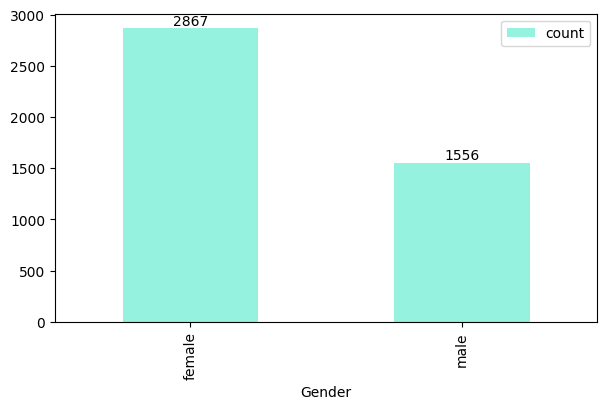

In [17]:
ax = pd.DataFrame(df['Gender'].value_counts().nlargest(10)).plot(kind = 'bar' , color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insights :- Most of the students are Female as compare to Male**

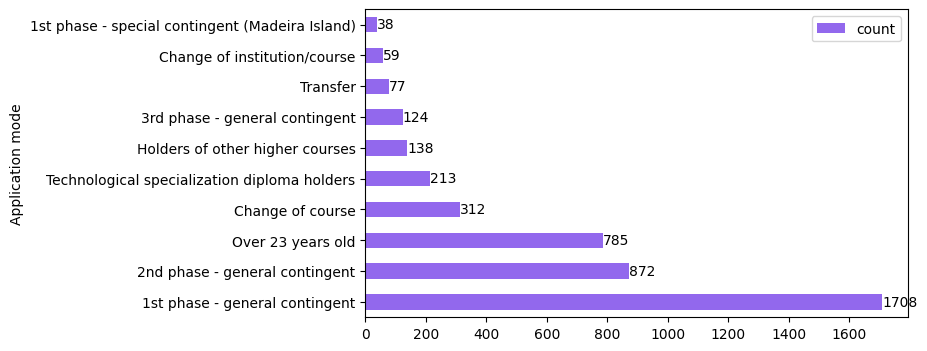

In [18]:
ax = pd.DataFrame(df['Application mode'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#9268ed' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insight:- Most of the student has Application mode as "1st Phase - general contingent"**

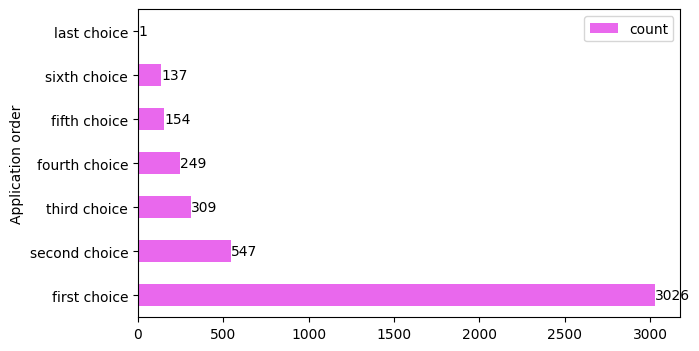

In [19]:
ax = pd.DataFrame(df['Application order'].value_counts()).plot(kind = 'barh' , color='#e968ed' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Most of the student has "First Choice" Application Order**

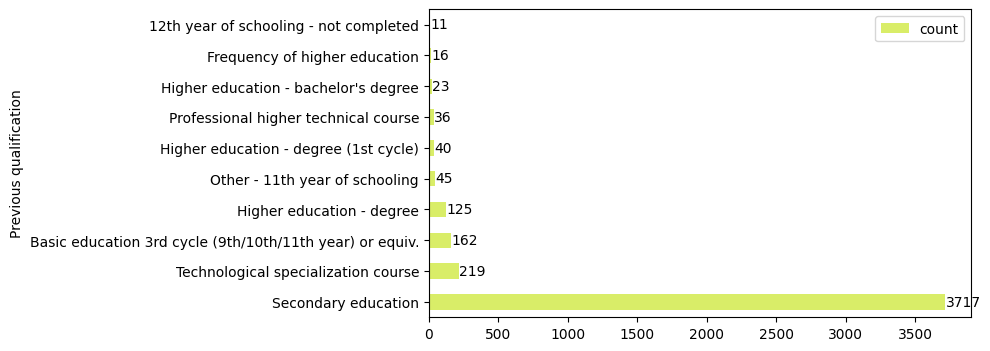

In [20]:
ax = pd.DataFrame(df['Previous qualification'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#d9ed68' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Most of the students has Privious qualification of "Secondary Education" and least student has "12th schooling"**

<Axes: title={'center': 'Attaindence % in Day & Evening Time'}, ylabel='count'>

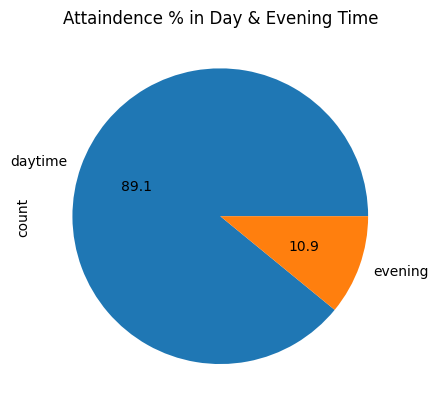

In [21]:
df['Attendance'].value_counts().plot(kind='pie' , autopct='%.1f',title='Attaindence % in Day & Evening Time')

**89.1% student attending during DayTime and only 10.9% student attend during Night Time**

<Axes: title={'center': 'Percentage of Graduate / Dropout / Enrolled'}, ylabel='count'>

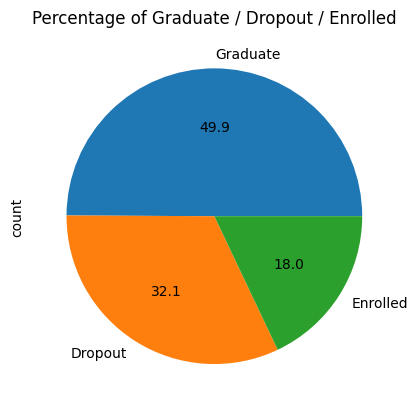

In [22]:
df['Target'].value_counts().plot(kind='pie' , autopct='%.1f',title='Percentage of Graduate / Dropout / Enrolled')

**Above Pie chart shows :
49.9% of student has graduate , 
32.1% of student has Dropout , 
18.0 % of students has Enrolled**

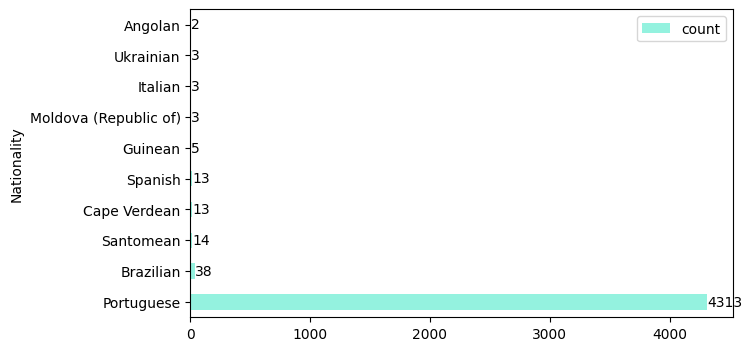

In [23]:
ax = pd.DataFrame(df['Nationality'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insight:- Most of the students has Portuguese Nationality near about 97% , Least students has Angolan Nationality**

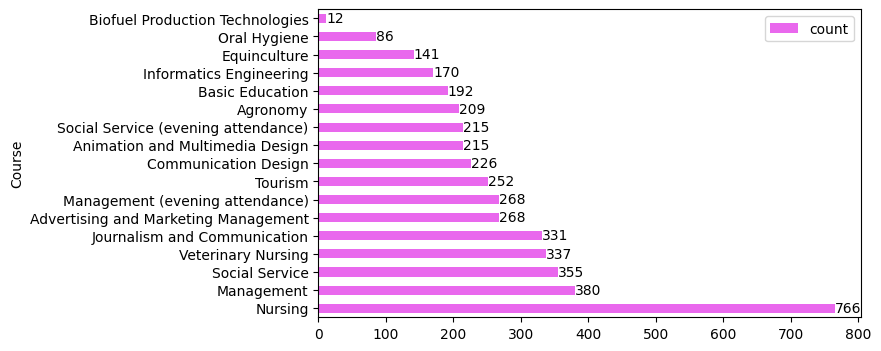

In [24]:
ax = pd.DataFrame(df['Course'].value_counts()).plot(kind = 'barh' , color='#e968ed' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Majority of students taken course of NURSING and Minimum student taken BIOFUEL PRODUCTION TECHNOLOGY**

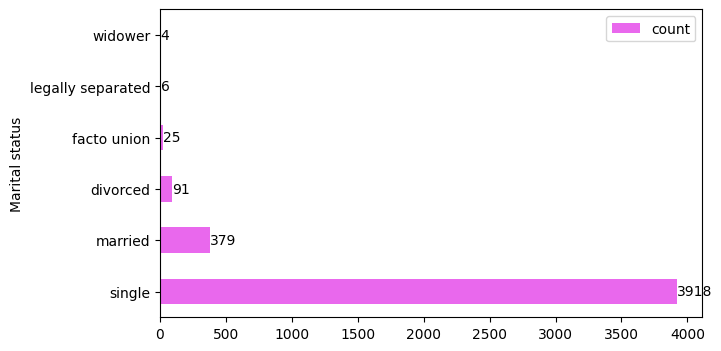

In [25]:
ax = pd.DataFrame(df['Marital status'].value_counts()).plot(kind = 'barh' , color='#e968ed' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insight :- Majority of student is single along with there is Married , Divorced , Facto union students , etc**

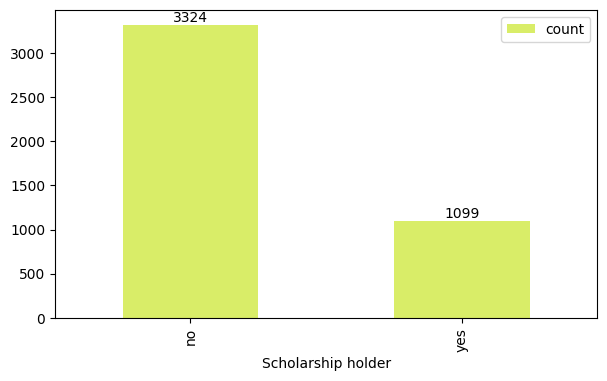

In [26]:
ax = pd.DataFrame(df['Scholarship holder'].value_counts()).plot(kind = 'bar' , color='#d9ed68' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insight:- ** Majority of student does not have Scholarship**

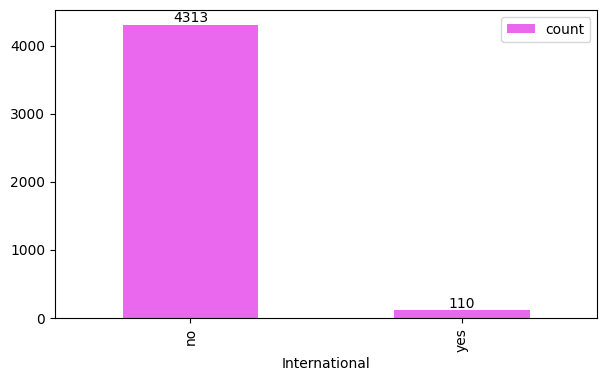

In [27]:
ax = pd.DataFrame(df['International'].value_counts()).plot(kind = 'bar' , color='#e968ed' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Insight:- Most of the Employee are not international , Its looking like this data is of Portuguese students**

**Bivariate Analysis**

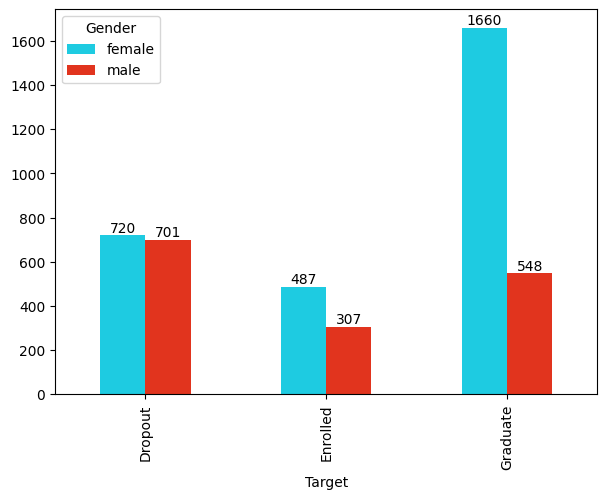

In [28]:
ax = pd.crosstab(df['Target'] , df['Gender']).plot(kind='bar' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

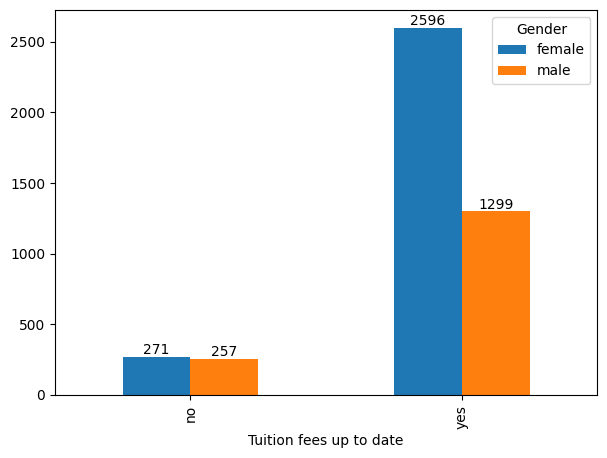

In [29]:
ax = pd.crosstab(df['Tuition fees up to date'], df['Gender']).plot(kind='bar', figsize=(7,5))
for container in ax.containers:
    ax.bar_label(container)

**Insight:- Females are paying Tution Fees up to date**

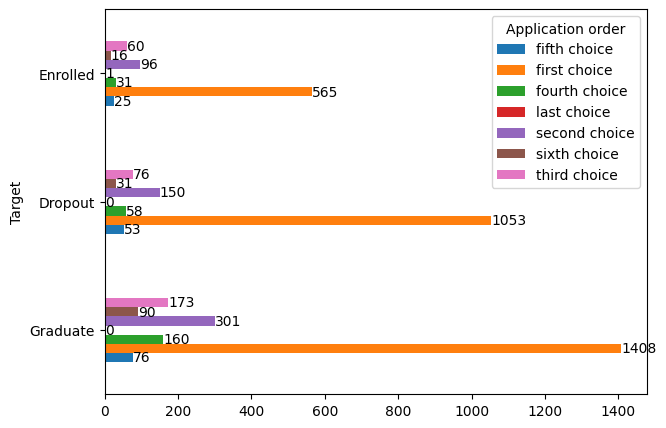

In [30]:
ax = pd.crosstab(df['Target'] , df['Application order']).nlargest(10 ,columns= df['Application order']).plot(kind='barh' , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

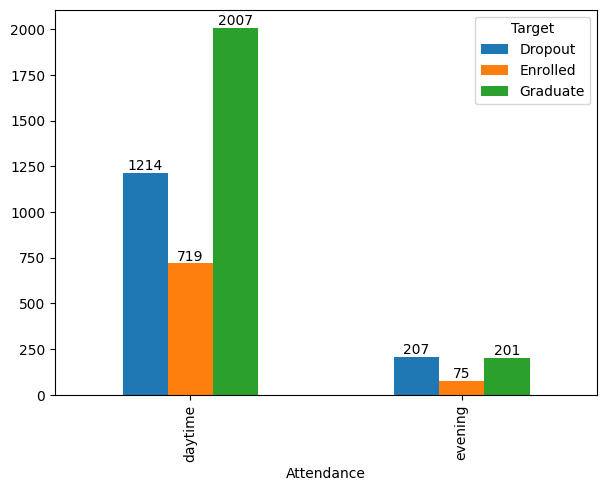

In [31]:
ax = pd.crosstab(df['Attendance'] , df['Target']).plot(kind='bar' , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Marital status', ylabel='count'>

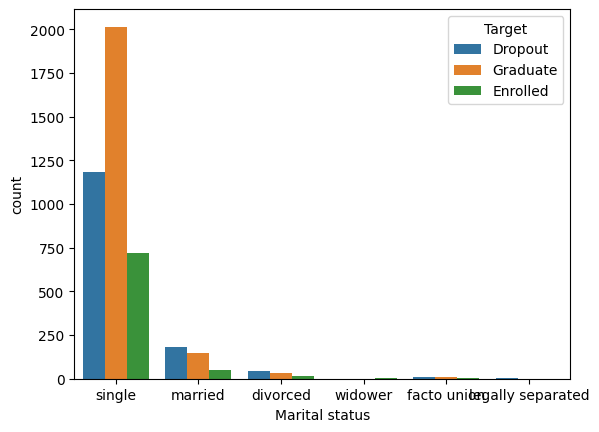

In [32]:
sns.countplot(data=df,x='Marital status',hue='Target')

<Axes: xlabel='Scholarship holder', ylabel='count'>

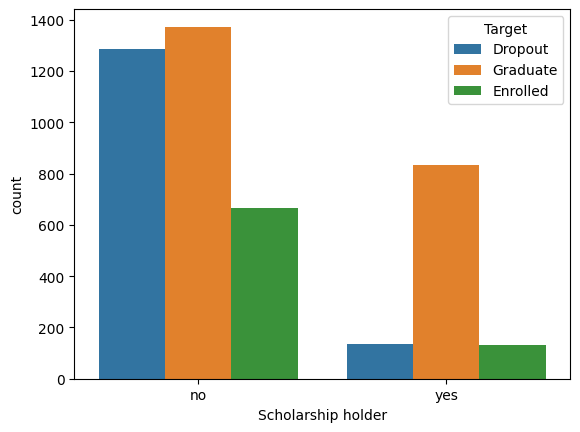

In [33]:
sns.countplot(data=df,x='Scholarship holder',hue='Target')

**The plot shows that the dropout and enrolled rate for scholarship holding students are approximately equal.**

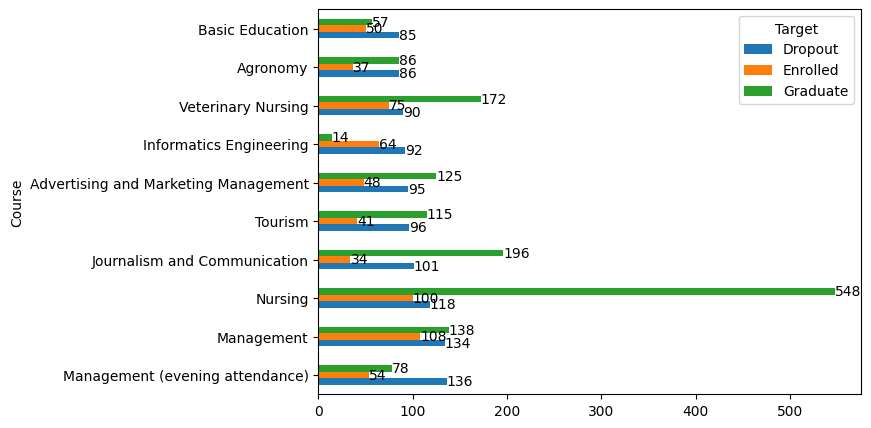

In [34]:
ax = pd.crosstab(df['Course'] , df['Target']).nlargest(10 , columns=df['Target']).plot(kind='barh' , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**The plot represent that In Nursing course most of students are graduated and In Agronomy course Dropout and Graduate rates are equal.**

## KNN Classification ML Algorithm

### Data Preprocessing

**Imporing Dataset**

In [35]:
df = pd.read_csv(r"C:\Users\User\Downloads\data - data.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Shape of Dataset**

In [36]:
df.shape

(4424, 37)

**Features of Dataset**

In [37]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

**Information about Features in Dataset**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

**Data type Of Features**

In [39]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

**Missing Values Identification**

<Axes: >

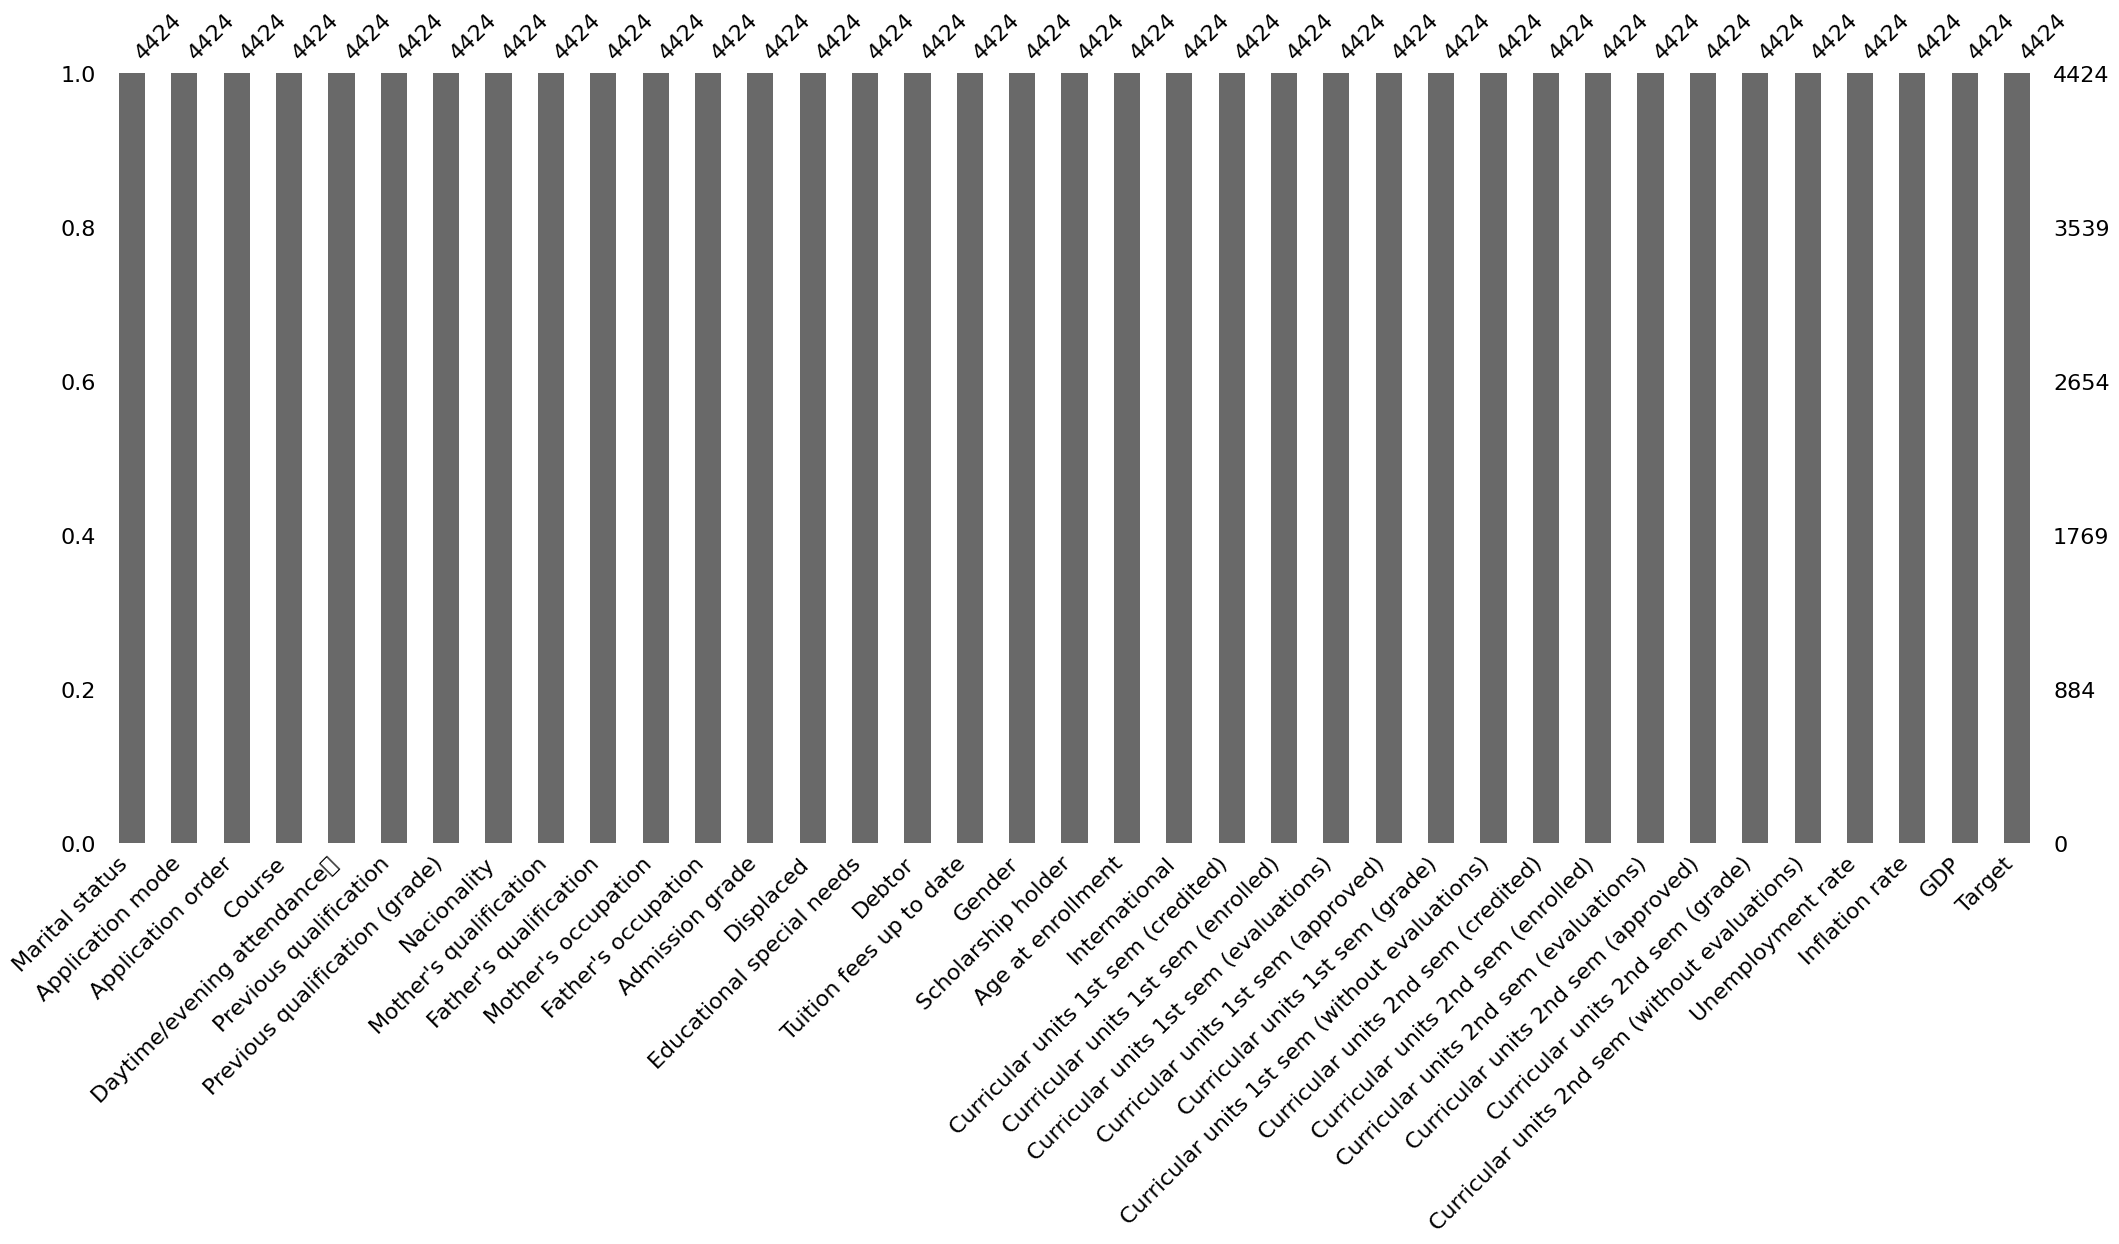

In [40]:
missingno.bar(df)

**Duplicates Records Identification**

In [41]:
df.duplicated().sum()

0

**Outliers Identification using Box Plot**

In [42]:
numeric_df = df[['Age at enrollment' , 'Unemployment rate' , 'Inflation rate' , 'GDP']]
numeric_df

,Age at enrollment,Unemployment rate,Inflation rate,GDP
0,20,10.8,1.4,1.74
1,19,13.9,-0.3,0.79
2,19,10.8,1.4,1.74
3,20,9.4,-0.8,-3.12
4,45,13.9,-0.3,0.79
...,...,...,...,...
4419,19,15.5,2.8,-4.06
4420,18,11.1,0.6,2.02
4421,30,13.9,-0.3,0.79
4422,20,9.4,-0.8,-3.12


**Structural Error Identification**

In [43]:
for i in df.columns:
    print(i , df[i].unique())

Marital status [1 2 4 3 5 6]
Application mode [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order [5 1 2 4 3 6 9 0]
Course [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance	 [1 0]
Previous qualification [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade) [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nacionality [  1 

**Splitting Data into Input And Output**

In [44]:
X = df.drop('Target' , axis = 1)
y = df['Target']

**Splitting Input And Output data in Train Test**

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.25 , random_state=13)
print("X_train shape (80% data)  :- " , X_train.shape)
print("X_test shape  (20% data)  :- " ,X_test.shape)

X_train shape (80% data)  :-  (3318, 36)
X_test shape  (20% data)  :-  (1106, 36)


In [46]:
X_test.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

**Data Preprocessing Techniques**

**Scaling for X_train**

In [47]:
std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train) , columns=std.get_feature_names_out())
X_train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.296188,-1.015013,-0.555852,0.182518,0.349947,-0.353514,2.616120,-0.134603,-0.039168,-0.196733,...,-0.202517,-0.279354,-0.097372,-0.268389,0.535503,0.755998,-0.195707,1.490329,1.155489,-1.810605
1,-0.296188,1.323271,-0.555852,-0.416093,-2.857577,-0.353514,-0.958433,-0.134603,1.116600,1.039308,...,1.152225,2.367408,0.360897,-0.268389,0.867552,0.865095,-0.195707,-1.483296,1.010504,0.131234
2,-0.296188,-0.672825,-0.555852,0.124320,0.349947,-0.157646,1.323196,-0.134603,-1.066517,-1.302664,...,-0.202517,-0.279354,-0.555641,-2.059657,-1.456795,-1.944160,-0.195707,0.888076,-1.091779,0.339604
3,1.375160,-1.015013,-0.555852,0.107692,0.349947,-0.353514,0.486599,-0.134603,-0.039168,-0.196733,...,-0.202517,-0.279354,-0.555641,-0.268389,-0.128597,0.585533,1.113480,-0.278789,0.140594,0.760780
4,-0.296188,1.380302,-0.555852,0.107692,0.349947,-0.353514,-0.197890,-0.134603,-0.039168,1.039308,...,-0.202517,-0.279354,-0.555641,0.499297,0.203453,0.619626,1.113480,-0.278789,0.140594,0.760780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,-0.296188,-1.015013,-0.555852,0.483291,0.349947,-0.353514,0.334490,-0.134603,1.116600,0.974253,...,-0.202517,-0.279354,-0.097372,-0.012494,0.203453,0.308699,-0.195707,-1.483296,1.010504,0.131234
3314,-0.296188,1.152177,-0.555852,0.124320,0.349947,-0.157646,-0.197890,-0.134603,-1.194936,1.039308,...,3.861708,-0.279354,-0.555641,-2.059657,-1.456795,-1.944160,-0.195707,-0.278789,0.140594,0.760780
3315,-0.296188,-0.102512,-0.555852,0.138014,0.349947,-0.353514,-1.338705,-0.134603,-0.039168,0.974253,...,-0.202517,-0.279354,-0.555641,1.266983,-1.124745,0.155963,-0.195707,-0.805761,-1.454242,-1.393864
3316,-0.296188,-1.015013,0.196010,0.444166,0.349947,-0.353514,0.714762,-0.134603,1.180809,1.039308,...,-0.202517,-0.279354,-0.097372,0.755192,-0.460646,0.410523,-0.195707,-0.278789,0.140594,0.760780


**Scaling for X_test**

In [48]:
std = StandardScaler()
std.fit(X_test)
X_test = pd.DataFrame(std.transform(X_test) , columns=std.get_feature_names_out())
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.291190,-0.997828,-0.549263,0.315315,0.350489,-0.340416,-0.725304,-0.100002,1.121151,0.917623,...,1.719731,-0.291626,0.317177,-0.272326,-1.517913,-2.024097,-0.211522,0.841511,-1.146939,0.369713
1,-0.291190,-0.997828,1.034791,0.191611,0.350489,-0.340416,-0.650122,-0.100002,-0.026636,-1.446865,...,-0.195700,-0.291626,-0.577715,-0.764471,-1.517913,-2.024097,-0.211522,0.841511,-1.146939,0.369713
2,1.303146,1.195974,-0.549263,-4.089378,0.350489,0.735020,-1.702663,-0.100002,1.121151,0.917623,...,-0.195700,-0.291626,-2.814946,-1.994833,-1.517913,-2.024097,-0.211522,-1.506982,0.939789,0.166264
3,6.086152,-0.651438,-0.549263,0.315315,0.350489,3.472493,1.304595,-0.100002,1.121151,0.917623,...,-0.195700,0.207659,0.764623,0.711963,0.801346,0.657947,-0.211522,0.394179,1.731306,-0.708135
4,-0.291190,1.426901,-0.549263,0.444212,0.350489,-0.340416,-0.875667,-0.100002,-1.174424,-1.446865,...,-0.195700,-0.291626,-0.130269,-0.026254,-0.192623,0.171444,-0.211522,-0.835984,-1.506720,-1.322811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,-0.291190,1.195974,-0.549263,0.135425,0.350489,-0.340416,-1.702663,-0.100002,1.121151,0.917623,...,-0.195700,-0.291626,-0.577715,-0.518398,-1.517913,-2.024097,-0.211522,-0.314096,0.076315,0.780940
1102,-0.291190,-0.074122,-0.549263,0.191611,0.350489,-0.340416,-0.048671,-0.100002,-1.174424,-0.264621,...,-0.195700,-0.291626,-0.130269,-0.272326,0.470023,0.643078,-0.211522,0.841511,-1.146939,0.369713
1103,-0.291190,-0.997828,0.242764,0.341755,0.350489,-0.340416,0.703144,-0.100002,-1.174424,-0.264621,...,-0.195700,-0.291626,0.764623,-0.026254,1.132668,0.720329,-0.211522,1.698898,-0.715202,-0.370496
1104,-0.291190,-0.074122,1.826818,0.315315,0.350489,-0.340416,1.154232,-0.100002,-1.046892,-0.264621,...,-0.195700,-0.291626,0.764623,-0.026254,1.132668,0.807906,-0.211522,1.437954,1.083701,-1.729709


**Machine Learning KNeighbors Classifier Model based on default k_value**

In [49]:
knn = KNeighborsClassifier(n_neighbors=9 , p=1 , metric='minkowski')
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)
y_predict

array(['Dropout', 'Dropout', 'Dropout', ..., 'Graduate', 'Graduate',
       'Enrolled'], dtype=object)

In [50]:
accuracy_score(y_test , y_predict)

0.7377938517179023

In [51]:
precision_score(y_test , y_predict , average='weighted')

0.7248998396416493

In [52]:
recall_score(y_test , y_predict , average='weighted')

0.7377938517179023

In [53]:
f1_score(y_test , y_predict , average='weighted')

0.7148966385096959

**For Best Fit K-value comparing train_accuracy and test_accuracy**

In [54]:
k_value = []
test_accuracy = []
train_accuracy = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, p=1,metric='minkowski',)
    knn.fit(X_train , y_train)
    
    y_predict = knn.predict(X_test)
    y_predict_train = knn.predict(X_train)
    
    k_value.append(i)
    
    accuracy_test = accuracy_score(y_test , y_predict)
    accuracy_train = accuracy_score(y_train , y_predict_train)
    
    test_accuracy.append(accuracy_test)
    train_accuracy.append(accuracy_train)

df_accuracy = pd.DataFrame({"K" : k_value ,"Train Accuracy" : train_accuracy, "Test Accuracy" : test_accuracy })
df_accuracy

,K,Train Accuracy,Test Accuracy
0,1,1.000000,0.688969
1,2,0.867691,0.650090
2,3,0.836649,0.709765
3,4,0.812839,0.715190
4,5,0.801386,0.737794
5,6,0.790838,0.735081
6,7,0.780289,0.737794
7,8,0.779084,0.741410
8,9,0.772152,0.737794
9,10,0.768837,0.731465


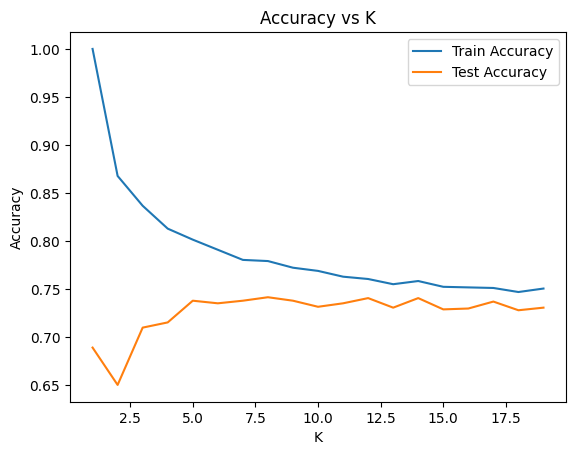

In [55]:
plt.plot(df_accuracy['K'], df_accuracy['Train Accuracy'], label='Train Accuracy')
plt.plot(df_accuracy['K'], df_accuracy['Test Accuracy'], label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.show()


**Comparing Train accuracy Validation Accuracy using K-Fold technique**

In [56]:
k = []
train_acc = []
valid_acc = []

X = df.drop('Target' , axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    train = accuracy_score(y_train, y_pred)
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=20)
    cross_val_acc = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    
    k.append(i)
    train_acc.append(train)
    valid_acc.append(cross_val_acc.mean())
    
df_val_trai_acc = pd.DataFrame({"K": k, "Train Accuracy": train_acc, "Validation Accuracy": valid_acc})
df_val_trai_acc

,K,Train Accuracy,Validation Accuracy
0,1,1.000000,0.594333
1,2,0.833032,0.573834
2,3,0.802291,0.626884
3,4,0.777577,0.628390
4,5,0.758288,0.630502
5,6,0.742315,0.631107
6,7,0.729355,0.641353
7,8,0.725437,0.638946
8,9,0.719108,0.646479
9,10,0.708258,0.647079


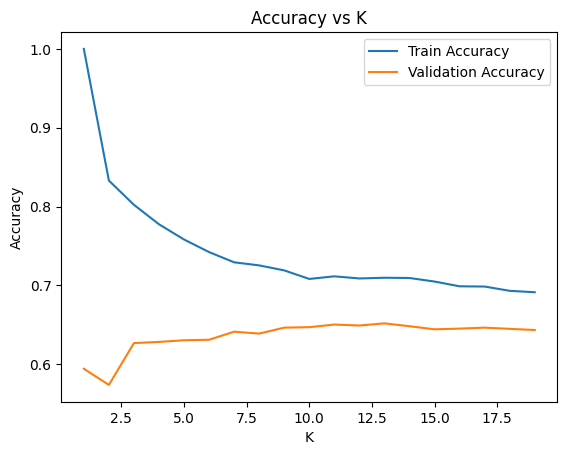

In [57]:
plt.plot(df_val_trai_acc['K'], df_val_trai_acc['Train Accuracy'], label='Train Accuracy')
plt.plot(df_val_trai_acc['K'], df_val_trai_acc['Validation Accuracy'], label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.show()

**According to both the comparison K-value for best fit should be  11 , 13 , 15 , 17 , 19**

In [61]:
knn = KNeighborsClassifier(n_neighbors=15 , p=1 , metric='minkowski')
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)
accuracy_score(y_test , y_predict)

0.6980108499095841

In [62]:
print("Accuracy Score:- " , accuracy_score(y_test , y_predict))
print("Precison Score:- " , precision_score(y_test , y_predict , average='weighted'))
print("Recal Score   :- " , recall_score(y_test , y_predict , average='weighted'))
print("F1 Score      :- " , f1_score(y_test , y_predict , average='weighted'))

Accuracy Score:-  0.6980108499095841
Precison Score:-  0.6766184526217993
Recal Score   :-  0.6980108499095841
F1 Score      :-  0.6625215286346862
